In [259]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
takehome_users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [261]:
takehome_user_engagement = pd.read_csv('takehome_user_engagement.csv', encoding = "ISO-8859-1" )
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [262]:
takehome_user_engagement.time_stamp = takehome_user_engagement.time_stamp.apply(pd.to_datetime)
#takehome_user_engagement.time_stamp = [x.date() for x in takehome_user_engagement['time_stamp'] ]
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [263]:
takehome_user_engagement_df = takehome_user_engagement.groupby(['user_id','time_stamp'])['visited']
takehome_user_engagement_df = takehome_user_engagement_df.agg({'count'})
takehome_user_engagement_df.columns = ['Number of Visiting']

takehome_user_engagement_df = takehome_user_engagement_df.groupby(level=0).head()
takehome_user_engagement_df.head()

Number of Visiting
user_id time_stamp                             
1       2014-04-22 03:53:30                   1
2       2013-11-15 03:45:04                   1
        2013-11-29 03:45:04                   1
        2013-12-09 03:45:04                   1
        2013-12-25 03:45:04                   1

In [265]:
takehome_user_engagement_df = takehome_user_engagement_df.groupby('user_id')['Number of Visiting'].resample('W', level='time_stamp').sum()

In [267]:
takehome_user_engagement_df = takehome_user_engagement_df.reset_index()
takehome_user_engagement_df.head()

,index,user_id,time_stamp,Number of Visiting
0,0,1,2014-04-27,1
1,1,2,2013-11-17,1
2,2,2,2013-11-24,0
3,3,2,2013-12-01,1
4,4,2,2013-12-08,0


In [268]:
adopted_user = takehome_user_engagement_df[takehome_user_engagement_df['Number of Visiting'] >= 3].user_id.unique()
adopted_user.shape

(292,)

In [269]:
takehome_users.isnull().values.any()  

True

In [270]:
takehome_users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [271]:
takehome_users = takehome_users.fillna(0)

In [273]:
takehome_users.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [274]:
takehome_users['adopted_user'] = takehome_users['object_id'].apply(lambda x : 'Yes' if x in adopted_user else 'No') 

In [277]:
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,No
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,No
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,No
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,No
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,No


In [279]:
target = takehome_users.adopted_user
target.unique()

array(['No', 'Yes'], dtype=object)

In [280]:
target.value_counts()

No     11708
Yes      292
Name: adopted_user, dtype: int64

In [281]:
print('{} percent of users were adopted.'.format(target.value_counts()[1]/(target.value_counts()[0]+target.value_counts()[1])))

0.024333333333333332 percent of users were adopted.


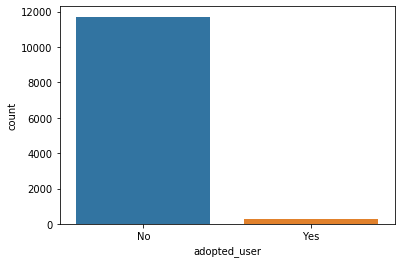

In [282]:
ax = sns.countplot(target,label="Count")       
Y, N = target.value_counts()

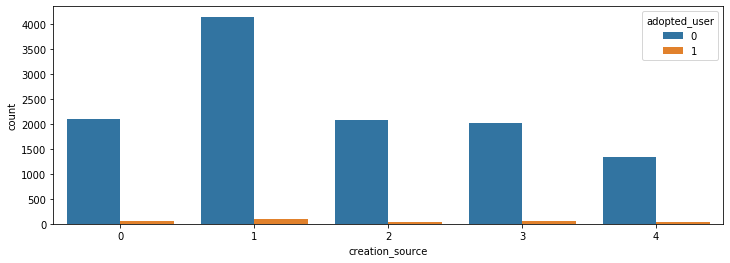

In [301]:

plt.figure(figsize=(12,4))
sns.countplot(x='creation_source', data=takehome_users, hue='adopted_user')

# Find importance of features with Random Forest

In [287]:
import matplotlib.ticker as mtick
from sklearn import ensemble
from sklearn.model_selection import train_test_split , RandomizedSearchCV , StratifiedShuffleSplit
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [283]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted_user                  12000 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 1.0+ MB


In [284]:
takehome_users.select_dtypes(include=['object']).columns

Index(['creation_time', 'name', 'email', 'creation_source', 'adopted_user'], dtype='object')

In [285]:
# Object data to category
for col in takehome_users.select_dtypes(include=['object']).columns:
    takehome_users[col] = takehome_users[col].astype('category')
    
# Encoding categorical features
for col in takehome_users.select_dtypes(include=['category']).columns:
    takehome_users[col] = takehome_users[col].cat.codes

In [289]:
model = ensemble.RandomForestClassifier(n_estimators=250,class_weight='balanced', max_depth=25)
model.fit(takehome_users[takehome_users.columns[takehome_users.columns != 'adopted_user']], takehome_users.adopted_user)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [290]:
df_plot = pd.DataFrame({'features': takehome_users.columns[takehome_users.columns != 'adopted_user'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

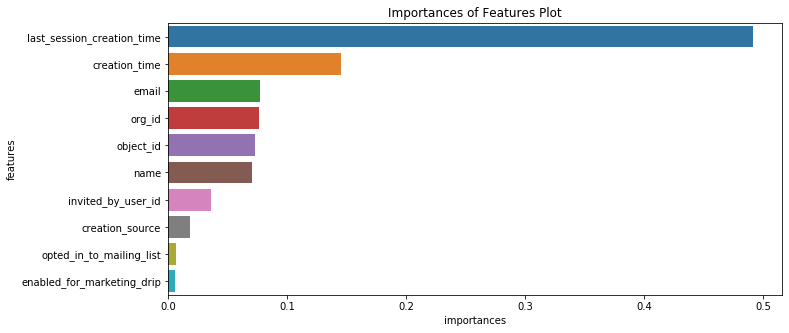

In [291]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

**It looks like features last_session_creation_time and creation time are most important factors that lead to user adoption.**

# Feature Selection with Variance Inflation Factor (VIF)

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [294]:
from sklearn.preprocessing import Imputer

transformer = ReduceVIF()

# Only use 10 columns for speed in this example
df_informative_VIF = transformer.fit_transform(takehome_users[takehome_users.columns[takehome_users.columns != 'adopted_user']], target)

df_informative_VIF.head()

ReduceVIF fit
ReduceVIF transform


C:\Users\Amin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1.0,10807.0,2087.0,1047.0,0.0,1.398139e+09,1.0,0.0,11.0,10803.0
1,2.0,7647.0,8488.0,7290.0,1.0,1.396238e+09,0.0,0.0,1.0,316.0
2,3.0,3939.0,1259.0,7681.0,1.0,1.363735e+09,0.0,0.0,94.0,1525.0
3,4.0,4845.0,2099.0,7971.0,0.0,1.369210e+09,0.0,0.0,1.0,5151.0
4,5.0,3018.0,8708.0,3718.0,0.0,1.358850e+09,0.0,0.0,193.0,5240.0


**Split data on balanced training set and test set**

In [295]:
# Train & Test split VIF
train_data_VIF, test_data_VIF, train_labels_VIF, test_labels_VIF = train_test_split(df_informative_VIF, target, test_size = 0.3, random_state=0, stratify=target)

# XGboost

In [296]:
# Create model

model = xgb.XGBClassifier()

# Create parameters grid

parameters_grid = { 'learning_rate' : [0.1, 0.2, 0.5], 'max_depth' : [5, 10, 15], 'n_estimators' : [150, 250, 300], 'min_child_weight' : [3, 5, 10] }

# Strategy of cross validation

cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3)

# Create Grid search Strategy

grid_cv = RandomizedSearchCV(model, parameters_grid, scoring = 'accuracy', cv = cv)

# Fit model by Grid

grid_cv.fit(train_data_VIF, train_labels_VIF)

# Model with the best estimator

grid_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [297]:
model_VIF = xgb.XGBClassifier(learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=250)

In [298]:
# with VIF features
model_VIF.fit(train_data_VIF, train_labels_VIF)
# Predicting
predict_labels_VIF = model_VIF.predict(test_data_VIF)

# The results of the XGBoost algorithm with VIF feature selection

In [299]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_VIF, predict_labels_VIF))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      3512
         Yes       0.17      0.02      0.04        88

    accuracy                           0.97      3600
   macro avg       0.57      0.51      0.51      3600
weighted avg       0.96      0.97      0.96      3600



In [300]:
ac = accuracy_score(test_labels_VIF,model_VIF.predict(test_data_VIF))
print('Accuracy is: ',ac)

Accuracy is:  0.9733333333333334
